# 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

모델 설계, 손실함수 정의와 기울기 계산.


회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀

 ### 1 데이터 가져오기

In [3]:
# sklearn.datasets의 load_diabetes에서 데이터를 가져와 diabetes의 data를 df_X에, target을 df_y에 저장

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# load_diabetes 데이터 가져오기 
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(dir(diabetes))

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']


In [4]:
type(diabetes)

sklearn.utils.Bunch

In [5]:
# diabetes의 data를 df_X에 저장
df_X = diabetes.data

print(df_X.shape)
df_X

(442, 10)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
# diabetes의 target을 df_y에 저장
df_y = diabetes.target

print(df_y.shape)
df_y

(442,)


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
# diabetes의 target을 re_y에 따로 저장
re_y = diabetes.target.reshape(-1,1) 
re_y 

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [8]:
diabetes.feature_names 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [10]:
# diabetes.feature_names 을 컬럼명으로 하는 DataFrame 자료형으로 변환해서 diabetes_df 변수에 저장
diabetes_df = pd.DataFrame(data=df_X, columns=diabetes.feature_names )

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [13]:
# data와 target을 합친 새로운 데이터프레임 whole_data 생성 
columns = diabetes.feature_names 
columns.append("Target")

whole_data = np.concatenate([df_X,re_y],axis=1)
whole_df = pd.DataFrame(whole_data,columns = columns)
whole_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


<AxesSubplot:>

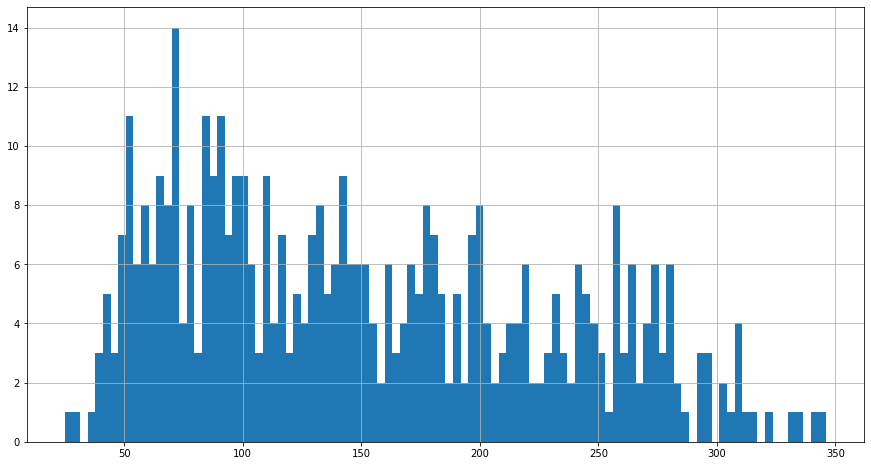

In [14]:
# target(hist)
whole_df['Target'].hist(bins=100, figsize=(15,8))

In [15]:
# 상관계수
rel_df = whole_df.corr()
rel_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


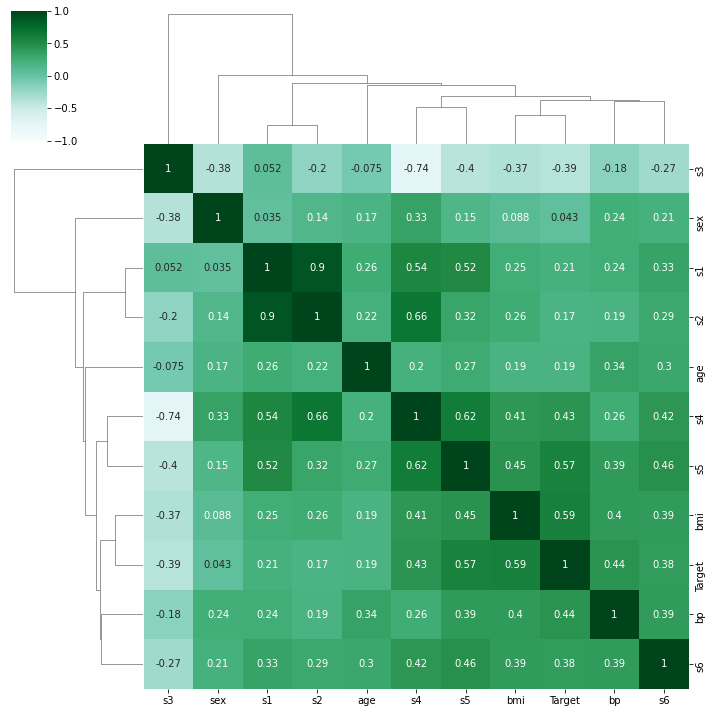

In [16]:
# 히트맵으로 상관관계 파악 

sns.clustermap(rel_df, annot = True, cmap = 'BuGn', vmin = -1, vmax = 1)

### 2. 모델에 입력할 데이터 X 준비하기


In [17]:
# df_X에 있는 값들을 numpy array로 변환해서 저장
type(df_X)

numpy.ndarray

### 3 모델에 예측할 데이터 y 준비하기

In [18]:
# df_y에 있는 값들을 numpy array로 변환해서 저장
type(df_y)

numpy.ndarray

### 4 train 데이터와 test 데이터로 분리하기


In [19]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=2000)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### 5 모델 준비하기

In [20]:
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비. 모델 함수를 구현해주세요.
X = whole_df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
y = whole_df['Target'].values
print("X, y 준비완료!")

X, y 준비완료!


In [21]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
W, b

(array([0.09044418, 0.28266472, 0.34770969, 0.36874723, 0.78228766,
        0.3107783 , 0.35020984, 0.05834012, 0.50903508, 0.91560133]),
 0.9567254012738897)

In [22]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("모델 준비완료!")

모델 준비완료!


### 6 손실함수 loss 정의하기

In [24]:
# 손실함수를 MSE 함수로 정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("MSE 준비완료!")

MSE 준비완료!


In [25]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("loss 준비완료!")

loss 준비완료!


### 7 기울기를 구하는 gradient 함수 구현하기

In [26]:
# 기울기를 계산하는 gradient 함수를 구현
# gradient 함수 정의 
def gradient(X, W, b, y):
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("gradient 함수 준비완료!")

gradient 함수 준비완료!


In [27]:
# 시험삼아 gradient 하나 출력!
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.37187437 -0.31254312 -4.2902482  -3.22796107 -1.54467619 -1.26767042
  2.8899129  -3.14663521 -4.13773065 -2.79380924]
db: -302.3535175232441


### 8. 하이퍼 파라미터인 학습률 설정

In [28]:
# 학습률, learning rate 를 설정. 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험
LEARNING_RATE = 0.0001

### 9.  모델 학습하기

In [29]:
# 정의된 손실함수와 기울기 함수로 모델을 학습. loss값이 충분히 떨어질 때까지 학습을 진행.입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 21730.6008
Iteration 2000 : Loss 16603.6512
Iteration 3000 : Loss 13164.2540
Iteration 4000 : Loss 10856.0183
Iteration 5000 : Loss 9306.0001
Iteration 6000 : Loss 8264.2180
Iteration 7000 : Loss 7563.1115
Iteration 8000 : Loss 7090.3662
Iteration 9000 : Loss 6770.6986
Iteration 10000 : Loss 6553.6468


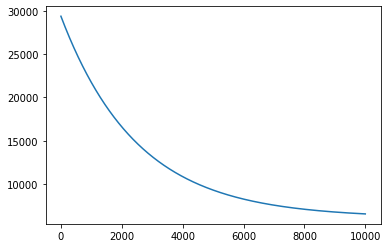

In [30]:
# loss 그래프 
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [31]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

4920.241434964536

In [32]:
# 학습률 바꿔서 다시 시도! 복잡한 데이터셋에서 학습률은 0.0001~0.01로 설정한다고 한다!
LEARNING_RATE = 0.001

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 6053.9656
Iteration 2000 : Loss 5965.6212
Iteration 3000 : Loss 5887.3067
Iteration 4000 : Loss 5811.6150
Iteration 5000 : Loss 5738.3280
Iteration 6000 : Loss 5667.3612
Iteration 7000 : Loss 5598.6356
Iteration 8000 : Loss 5532.0749
Iteration 9000 : Loss 5467.6056
Iteration 10000 : Loss 5405.1565


In [33]:
# 학습률을 많이 높여보자!
LEARNING_RATE = 0.05

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3819.2334
Iteration 2000 : Loss 3384.6277
Iteration 3000 : Loss 3204.7887
Iteration 4000 : Loss 3105.6841
Iteration 5000 : Loss 3043.8689
Iteration 6000 : Loss 3003.3844
Iteration 7000 : Loss 2976.1962
Iteration 8000 : Loss 2957.5923
Iteration 9000 : Loss 2944.6376
Iteration 10000 : Loss 2935.4534


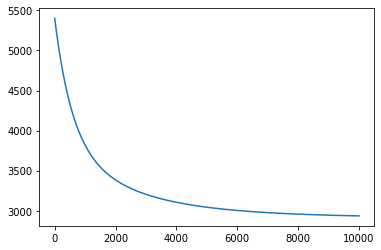

In [34]:
# loss 그래프 
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

### 10. test 데이터에 대한 성능 확인

In [35]:
# test 데이터에 대한 성능을 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2808.3372957393126

### 11.  정답 데이터와 예측한 데이터 시각화하기

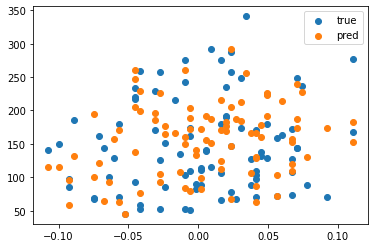

In [36]:
#x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### 1.  데이터 가져오기


In [38]:
# 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다. 여기에서 데이터를 상세히 확인.
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
test = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

In [39]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


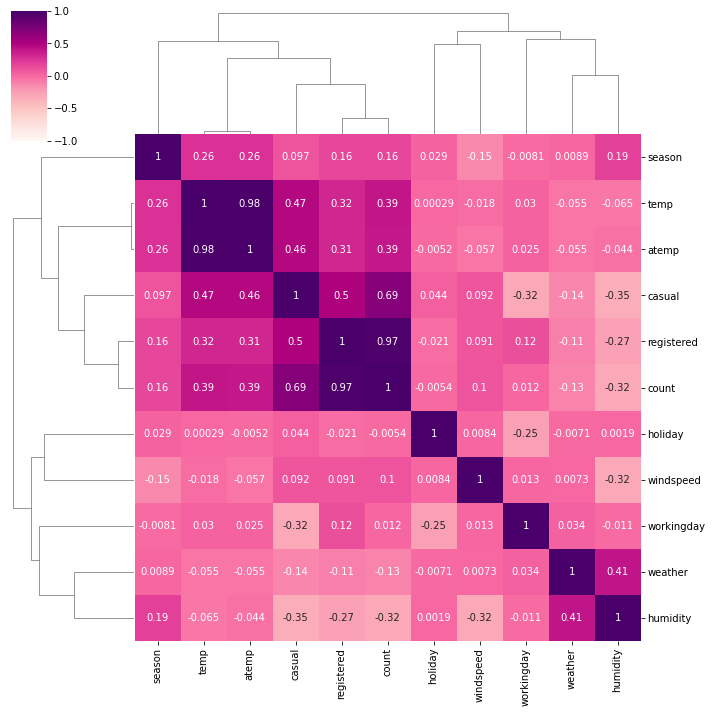

In [41]:
# 히트맵으로 상관관계 파악 
rel = train.corr()
sns.clustermap(rel, annot = True, cmap = 'RdPu', vmin = -1, vmax = 1)

### 2 datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [42]:
# to_datetime 활용 : 링크 참조, #pandas datetime extract year month day 키워드로 검색
import datetime as dt

train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day                               
train['hour'] = pd.to_datetime(train['datetime']).dt.hour                               
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second                              
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


### 3. year, month, day, hour, minute, second 데이터 개수 시각화

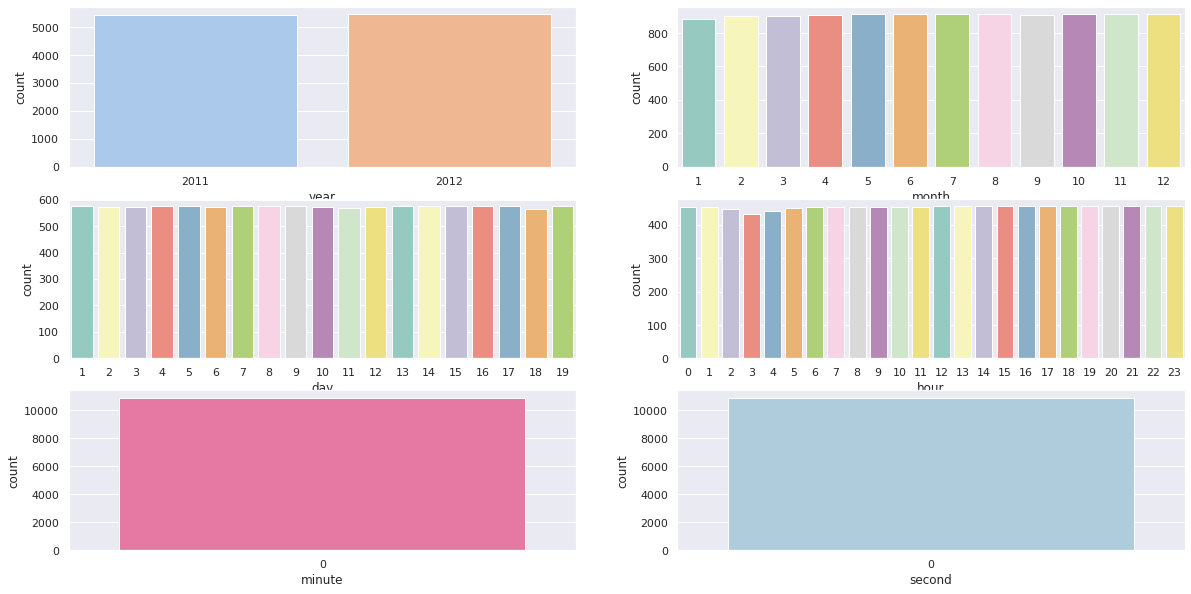

In [43]:
# sns.countplot 활용해서 시각화하기, subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
fig = plt.figure(figsize=(20,10))
sns.set(color_codes=True)

ax01 = fig.add_subplot(3,2,1)
ax02 = fig.add_subplot(3,2,2)
ax03 = fig.add_subplot(3,2,3)
ax04 = fig.add_subplot(3,2,4)
ax05 = fig.add_subplot(3,2,5)
ax06 = fig.add_subplot(3,2,6)

sns.countplot(x='year', palette='pastel', data=train, ax=ax01)
sns.countplot(x='month', palette='Set3', data=train, ax=ax02)
sns.countplot(x='day', palette='Set3', data=train, ax=ax03)
sns.countplot(x='hour', palette='Set3', data=train, ax=ax04)
sns.countplot(x='minute', palette='RdPu', data=train, ax=ax05)
sns.countplot(x='second', palette='Paired', data=train, ax=ax06)

plt.show()

### 4.  X, y 컬럼 선택 및 train/test 데이터 분리

In [44]:
# X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

# count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [45]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','year', 'month', 'day', 'hour', 'minute', 'second']].values
y = train['count'].values
print("X, y 준비완료!")

X, y 준비완료!


In [46]:
# train, test 데이터 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


### 5 Linear Regression 모델 학습


In [47]:
# sklearn의 LinearRegression 모델 불러오기 및 학습하기
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산


In [48]:
#학습된 모델에 X_test를 입력해서 예측값 출력하기, 모델이 예측한 값과 정답 target 간의 손실함수 값 계산, #mse 값과 함께 rmse 값도 계산하기
pred = model.predict(X_test)
pred

array([119.40505321, 208.94410497, 234.40474256, ..., 202.11088775,
       127.77335843, 216.79183335])

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print('mse : ', mse)

mse :  19218.40491919502


In [51]:
rmse = mean_squared_error(y_test, pred)**0.5
print('rmse : ', rmse)

rmse :  138.63046172899743


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print('mse : ', mse)

### 7.  x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기


<AxesSubplot:xlabel='temp', ylabel='count'>

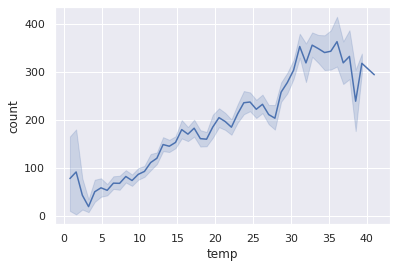

In [52]:
#x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화.x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화.

sns.lineplot(x='temp', y='count', data=train)


<AxesSubplot:xlabel='humidity', ylabel='count'>

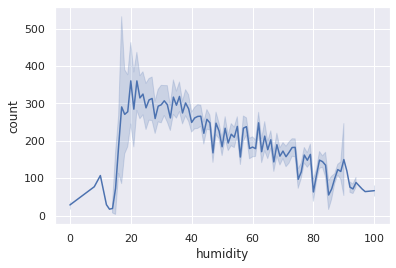

In [53]:
sns.lineplot(x='humidity', y='count', data=train)

## 회고 
1. 목, 금요일 저녁까지 노드 4-10까지 이해하는데 시간이 다 들어갔음. 금요일 밤 10시에 프로젝트를 겨우 시작할수 있었는데 머리가 다 소진돼 '김효린 코드' 붙여넣기 했습니다. 죄송합니다. 


2. 아래 내용은 노드 Exploration 4를 파악하면서 느낀 내용. 
  
  -  그래프 크기 조절하는것 노드, 검색등으로 plt.rcParams["figure.figsize"] = (14,4), plt.figure(figsize=(20,10)), 
       fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4)) 3가지 모두 에러나서  그래프 크기 그대로  진행. 시간되면 더 찾아봐야 할듯. 
   
  -  x = np.linspace(0, 8, 9) 검색으로  (시작점, 끝점, 칸의 수가 아니고 눈금갯수 )라는걸 알고나니 그래프가 훨씬 잘 들어옴.

  -  4-9의 Gradient 관련 미분은 아직도 선명하게 이해 안된다,

  - (기울기 w, y절편을 b) , 기울기 w' w가 있는데 아래 기울기 g는 왜 나옴 ? -> - 원함수의 기울기인 w와, w-loss 그래프의 기울기인 g를 구분해야함 
 
  - 4-8 train 데이터와 test 데이터로 분리하고 W # Q 왜 이대목서 array가 나옴?,-> w에는 12개의 랜덤한 값으로 w1부터 w12가 담겼다고 이해하기로.
